In [3]:
from prophet import Prophet

C:\Users\DISHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('Totals.csv')

In [6]:
data.head()

,Date,Subscribers
0,2014-11-21,0
1,2014-11-22,0
2,2014-11-23,0
3,2014-11-24,0
4,2014-11-25,0


In [7]:
data.tail()

,Date,Subscribers
3557,2024-08-17,2
3558,2024-08-18,1
3559,2024-08-19,1
3560,2024-08-20,1
3561,2024-08-21,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3562 non-null   object
 1   Subscribers  3562 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 55.8+ KB


In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3562 non-null   datetime64[ns]
 1   Subscribers  3562 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 55.8 KB


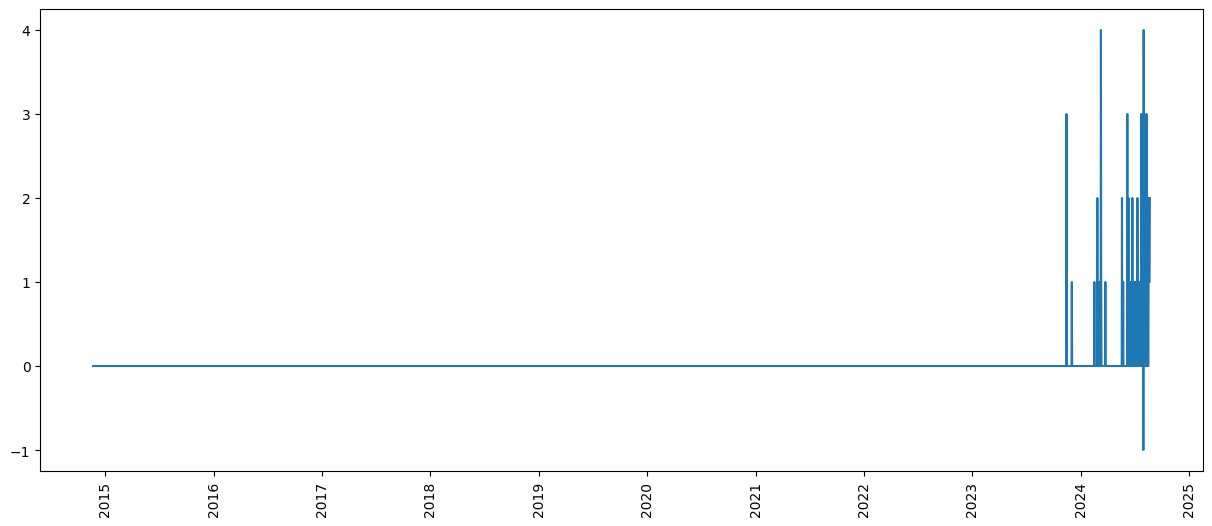

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(data['Date'], data['Subscribers'])
plt.xticks(rotation='vertical')
plt.show()

In [12]:
m = Prophet()
data.columns = ['ds','y']

In [13]:
model = m.fit(data)

22:41:24 - cmdstanpy - INFO - Chain [1] start processing
22:41:26 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future = m.make_future_dataframe(periods=10,freq='D')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3567,2024-08-27,0.319105,0.070312,0.586675
3568,2024-08-28,0.318413,0.068448,0.572804
3569,2024-08-29,0.318624,0.067576,0.559453
3570,2024-08-30,0.306607,0.052679,0.556059
3571,2024-08-31,0.316466,0.076707,0.556474


In [48]:
forecast['yhat_upper'].sum()

958.825619951323

C:\Users\DISHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\DISHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\DISHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

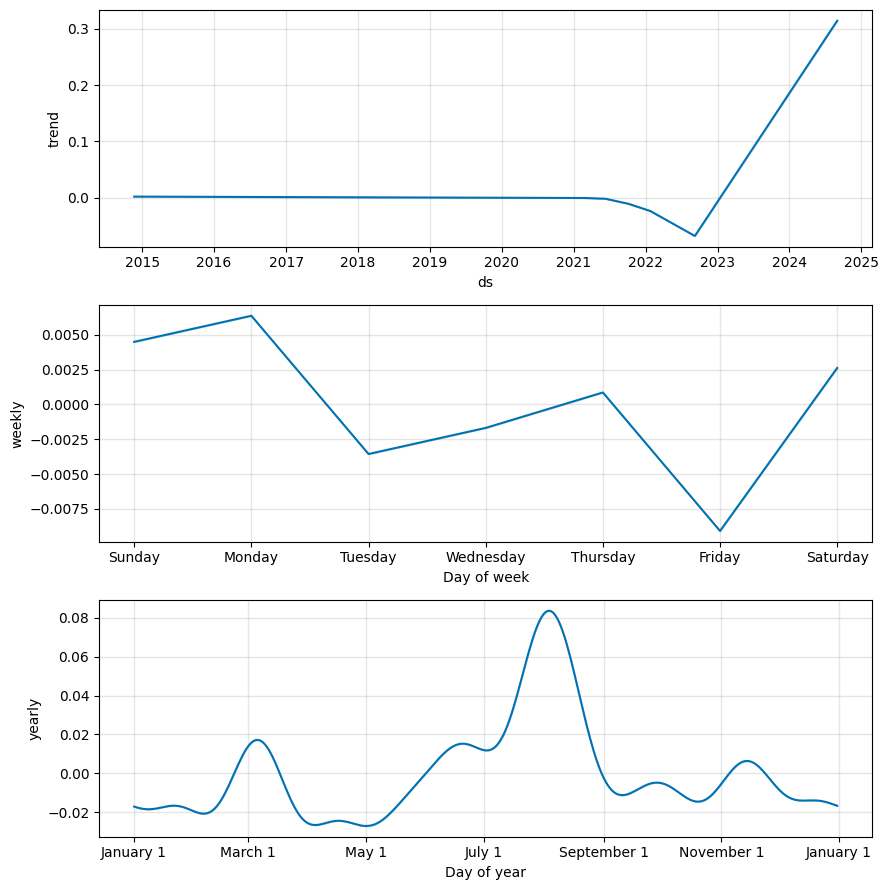

In [24]:
from prophet.plot import plot_plotly, plot_components_plotly
fig1 = m.plot(forecast)

C:\Users\DISHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\DISHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


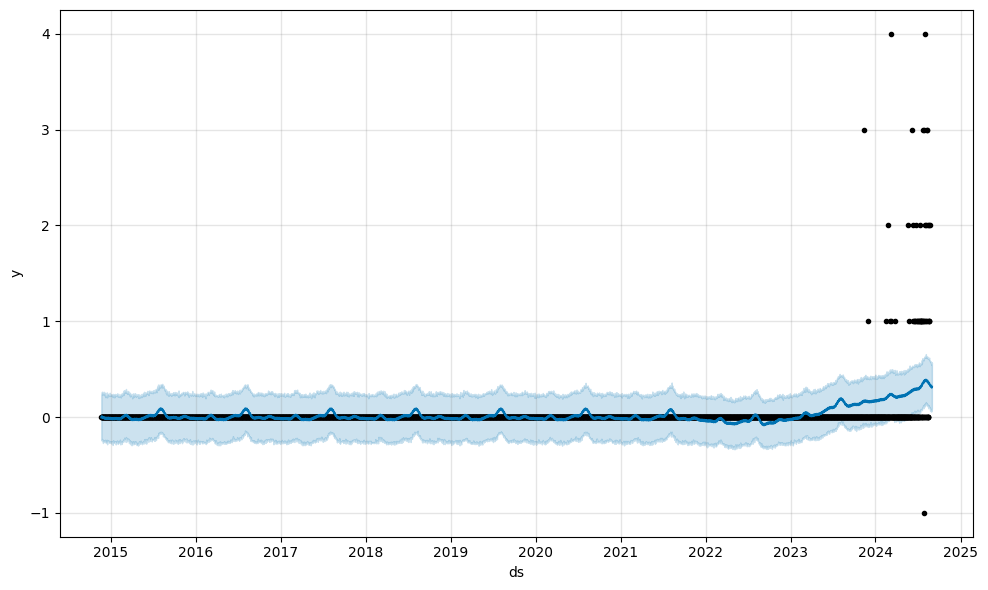

In [29]:
fig1 = m.plot(forecast)